<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/Non_Negative_Matrix_Factorization_Unsupervised_ML_M6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Foundation
Course 4, Part e: Non-Negative Matrix Factorization DEMO
This exercise illustrates usage of Non-negative Matrix factorization and covers techniques related to sparse matrices and some basic work with Natural Langauge Processing. We will use NMF to look at the top words for given topics.

Data
We'll be using the BBC dataset. These are articles collected from 5 different topics, with the data pre-processed.

These data are available in the data folder (or online here). The data consists of a few files. The steps we'll be following are:

bbc.terms is just a list of words
bbc.docs is a list of artcles listed by topic.
At a high level, we're going to

Turn the bbc.mtx file into a sparse matrix (a sparse matrix format can be useful for matrices with many values that are 0, and save space by storing the position and values of non-zero elements).
Decompose that sparse matrix using NMF.
Use the resulting components of NMF to analyze the topics that result.
Data Setup
Note: This lab has been updated to work in skillsnetwork for your convenience.

In [1]:
import urllib

In [2]:
with urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/bbc.mtx') as r:
    content = r.readlines()[2:]

Part 1
Here, we will turn this into a list of tuples representing a sparse matrix. Remember the description of the file from above:

bbc.mtx is a list: first column is wordID, second is articleID and the third is the number of times that word appeared in that article.
So, if word 1 appears in article 3, 2 times, one element of our list will be:

(1, 3, 2)

In [3]:
sparsemat = [tuple(map(int,map(float,c.split()))) for c in content]
# Let's examine the first few elements
sparsemat[:8]

[(1, 1, 1),
 (1, 7, 2),
 (1, 11, 1),
 (1, 14, 1),
 (1, 15, 2),
 (1, 19, 2),
 (1, 21, 1),
 (1, 29, 1)]

Part 2: Preparing Sparse Matrix data for NMF






We will use the coo matrix function to turn the sparse matrix into an array.

In [4]:
import numpy as np
from scipy.sparse import coo_matrix
rows = [x[0] for x in sparsemat]
cols = [x[1] for x in sparsemat]
values = [x[2] for x in sparsemat]
coo = coo_matrix((values, (rows, cols)))

NMF
NMF is a way of decomposing a matrix of documents and words so that one of the matrices can be interpreted as the "loadings" or "weights" of each word on a topic.

Check out the NMF documentation and the examples of topic extraction using NMF and LDA.








Part 3
Here, we will import NMF, define a model object with 5 components, and fit_transform the data created above.

In [5]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.decomposition import NMF
model = NMF(n_components=5, init='random', random_state=818)
doc_topic = model.fit_transform(coo)

doc_topic.shape
# we should have 9636 observations (articles) and five latent features

(9636, 5)

In [6]:
# find feature with highest value per doc
np.argmax(doc_topic, axis=1)

array([0, 0, 2, ..., 4, 4, 4])

Part 4:
Check out the components of this model:

In [7]:
model.components_.shape

(5, 2226)

This is five rows, each of which is a "topic" containing the weights of each word on that topic. The exercise is to get a list of the top 10 words for each topic. We can just store this in a list of lists.







Note: Just like we read in the data above, we'll have to read in the words from the bbc.terms file.

In [8]:
with urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/bbc.terms') as r:
    content = r.readlines()
words = [c.split()[0] for c in content]

In [9]:
topic_words = []
for r in model.components_:
    a = sorted([(v,i) for i,v in enumerate(r)],reverse=True)[0:12]
    topic_words.append([words[e[1]] for e in a])

In [10]:
# Here, each set of words relates to the corresponding topic (ie the first set of words relates to topic 'Business', etc.)
topic_words[:5]

[[b'bondi',
  b'stanlei',
  b'continent',
  b'mortgag',
  b'bare',
  b'least',
  b'extent',
  b'200',
  b'leav',
  b'frustrat',
  b'yuan',
  b'industri'],
 [b'manipul',
  b'teenag',
  b'drawn',
  b'go',
  b'prosecutor',
  b'herbert',
  b'host',
  b'protest',
  b'hike',
  b'nation',
  b'calcul',
  b'power'],
 [b'dimens',
  b'hous',
  b'march',
  b'wider',
  b'owner',
  b'intend',
  b'declin',
  b'forc',
  b'posit',
  b'founder',
  b'york',
  b'unavail'],
 [b'rome',
  b'ft',
  b'regain',
  b'lawmak',
  b'outright',
  b'resum',
  b'childhood',
  b'greatest',
  b'citi',
  b'stagnat',
  b'crown',
  b'bodi'],
 [b'build',
  b'empir',
  b'isol',
  b'\xc2\xa312',
  b'restructur',
  b'closer',
  b'plung',
  b'depreci',
  b'durham',
  b'race',
  b'juli',
  b'segreg']]

The original data had 5 topics, as listed in bbc.docs (which these topic words relate to).

Business
Entertainment
Politics
Sport
Tech
In "real life", we would have found a way to use these to inform the model. But for this little demo, we can just compare the recovered topics to the original ones. And they seem to match reasonably well. The order is different, which is to be expected in this kind of model.

In [11]:
with urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/bbc.docs') as r:
    doc_content = r.readlines()

doc_content[:8]

[b'business.001\n',
 b'business.002\n',
 b'business.003\n',
 b'business.004\n',
 b'business.005\n',
 b'business.006\n',
 b'business.007\n',
 b'business.008\n']

(Supplemental) Term Frequency - Inverse Document Frequency
Estimated time needed: 15 minutes

As we've learned for non-negative matrix factorization, one application of this unsupervised dimensionality reduction is by applying it on a tf-idf matrix.

Why tf-idf?
An intuitive way to describe this is that for a given term in a document, we multiply the count of that term in the document by the how rare that term is throughout all the documents we are looking at.

Imagine any corpus of data. You'll probably see many many words that appear in almost all documents, such as the, and, and so. If you wanted to quickly analyze text to find the most important words in documents, just looking at word counts isn't good enough. Those previous words would dominate the term frequency in volume and clutter our analysis.

By performing tf-idf, we can reduce the value assigned to these words that are really common in all our documents, and increase the value of words that may appear a lot in a certain document, but not frequently in other documents.

Applications
WIth a tf-idf matrix, you can succintly capture important textual information from a large group of text documents. A corpus is defined as a large structured set of text. It gives you an efficient representation of what the important words are to each document, and potentially how the words can relate documents together.

We will be using tf-idf matrices in the next lab!

What is tf-idf?
A tf-idf matrix is a term frequency - inverse document frequency matrix. Every row within this matrix will represent a document, and every column represents a term (a term could be a single word or an n-tuple of words such as United States of America). A tf-idf matrix is actually an augmented term frequency, bag of words or document-term matrix.

What is term frequency?
A term frequency matrix simply counts the number of occurences of a given word within a document.

Objectives
After completing this lab you will be able to:

Understand what term frequency and tf-idf matrices are
Explain the intuition behind both matrices and how they are calculated
Apply tf-idf to a corpus of text and find the most important word in each document

Installing Required Libraries
The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the # sign before !mamba in the code cell below.

In [12]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [14]:
!pip install skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.1 MB/s eta 0:00:00


In [15]:
import re
import skillsnetwork
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

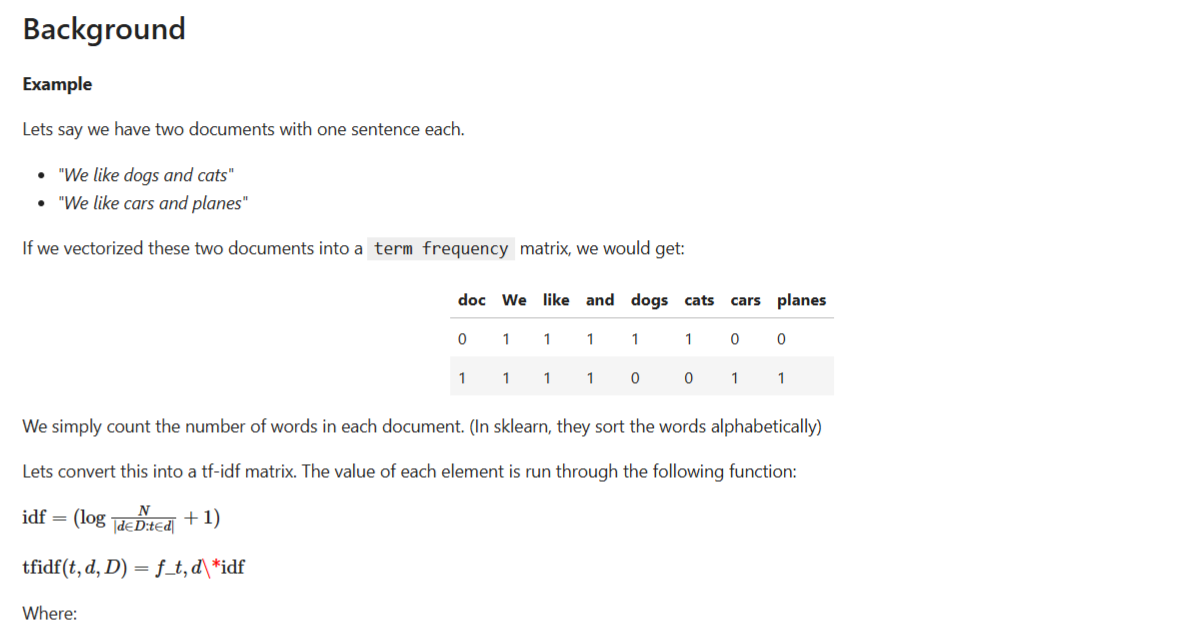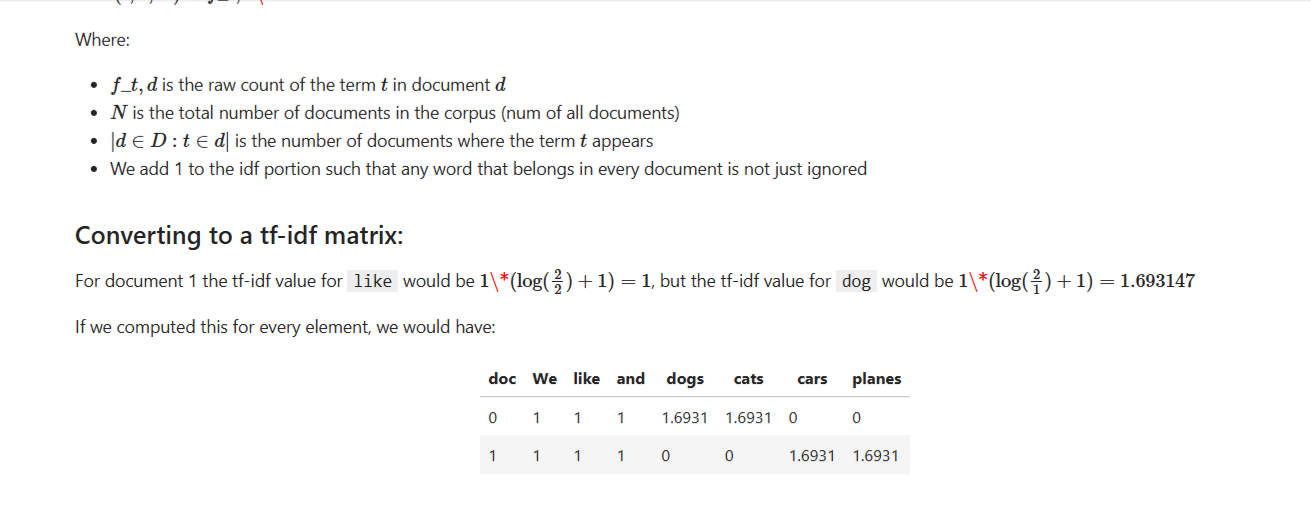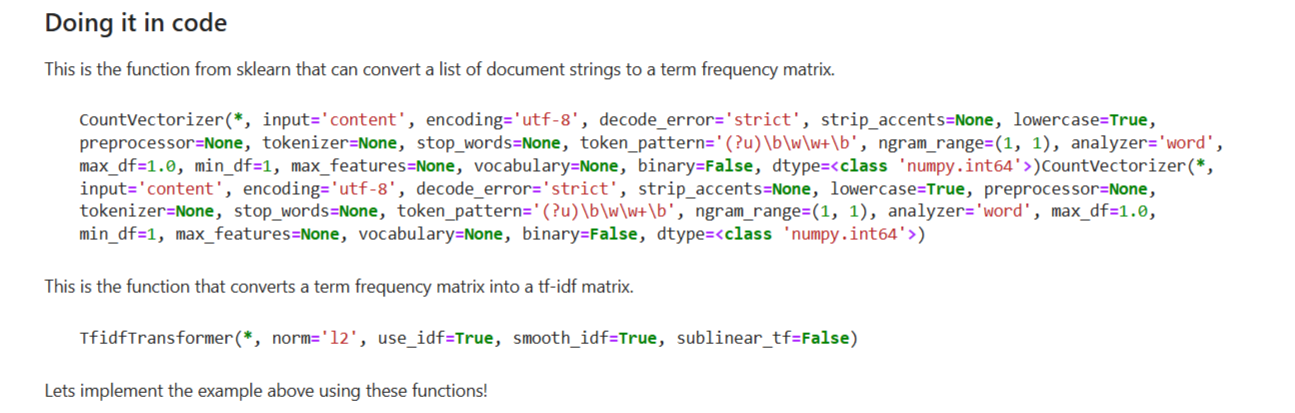

In [16]:
# Corpus
D = ["We like dogs and cats", "We like cars and planes"]

In [17]:
# Count Vectorizer creates a term frequency matrix
cv = CountVectorizer()
tf_mat = cv.fit_transform(D)
tf = pd.DataFrame(tf_mat.toarray(), columns = cv.get_feature_names_out())
tf

and  cars  cats  dogs  like  planes  we
0    1     0     1     1     1       0   1
1    1     1     0     0     1       1   1

In [18]:
# Creating the tfidf matrix
tfidf_trans = TfidfTransformer(smooth_idf=False)
tfidf_mat = tfidf_trans.fit_transform(tf)
tfidf = pd.DataFrame(tfidf_mat.toarray(), columns = tfidf_trans.get_feature_names_out())

The tf-idf matrix created above by sklearn does some normalization such that the norm (length) of each document vector (row) is 1. We can instead take the idf vector trained on our data and apply it directly to the term frequency matrix to get the non-normalized tf-idf matrix.

In [19]:
# Non-normalized tf-idf
pd.DataFrame(tfidf_trans.idf_ * tf.to_numpy(), columns = tfidf_trans.get_feature_names_out())

and      cars      cats      dogs  like    planes   we
0  1.0  0.000000  1.693147  1.693147   1.0  0.000000  1.0
1  1.0  1.693147  0.000000  0.000000   1.0  1.693147  1.0

In [20]:
# Normalized tf-idf
tfidf

and      cars      cats      dogs      like    planes        we
0  0.338381  0.000000  0.572929  0.572929  0.338381  0.000000  0.338381
1  0.338381  0.572929  0.000000  0.000000  0.338381  0.572929  0.338381

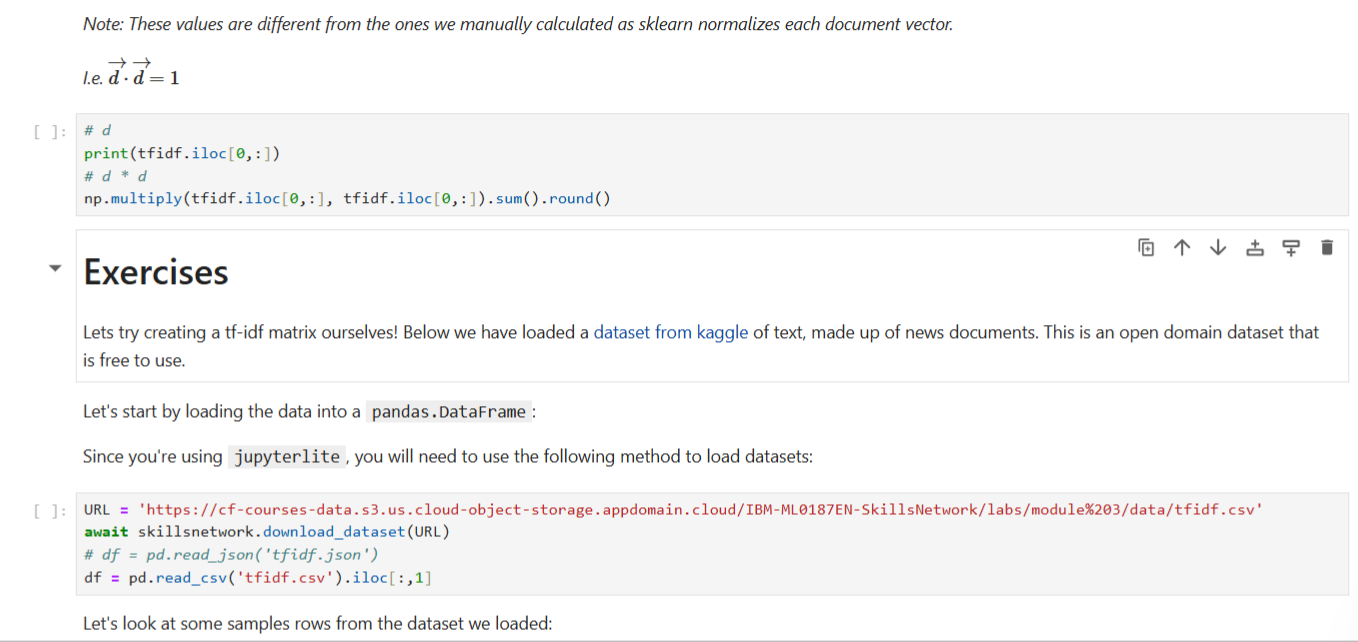

In [21]:
# d
print(tfidf.iloc[0,:])
# d * d
np.multiply(tfidf.iloc[0,:], tfidf.iloc[0,:]).sum().round()

and       0.338381
cars      0.000000
cats      0.572929
dogs      0.572929
like      0.338381
planes    0.000000
we        0.338381
Name: 0, dtype: float64


1.0

In [22]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/tfidf.csv'
await skillsnetwork.download_dataset(URL)
# df = pd.read_json('tfidf.json')
df = pd.read_csv('tfidf.csv').iloc[:,1]

Saved as 'tfidf.csv'


In [23]:
df.head(5)

0    Personally I have no idea what my IQ is. I’ve ...
1    I'm skeptical. A heavier lid would be needed t...
2    I think I have 100 cm of books on the subject....
3    Is chemistry hard in uni. Ive read somewhere t...
4    In addition to the other comment, you can crit...
Name: Comment, dtype: object

Exercise 1 - Count Vectorizering our text
Convert this matrix of documents into a term frequency matrix. Note that this dataset has numbers, and we want to remove them for simplicity sake.

Use the following function and plug it into CountVectorizer(preprocessor=preprocess_text) as an argument.

We also want to limit the Countvectorizer to just the top 500 words using the max_features argument.

Apply the CountVectorizer to the df Series and name the columns to the features from the cv.get_feature_names_out() function

In [24]:
# Lets remove the numbers
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

In [25]:
# Your solution here
cv = CountVectorizer(max_features = 500, preprocessor = preprocess_text)
tf = cv.fit_transform(df)
pd.DataFrame(tf.toarray(), columns = cv.get_feature_names_out())

able  about  above  acid  acids  actually  add  after  again  ago  ...  \
0        0      0      0     0      0         0    0      0      0    0  ...   
1        0      0      0     0      0         0    0      0      0    0  ...   
2        1      0      0     0      0         0    0      0      0    0  ...   
3        0      0      0     0      0         0    0      1      0    0  ...   
4        0      0      0     0      0         0    0      0      0    0  ...   
...    ...    ...    ...   ...    ...       ...  ...    ...    ...  ...  ...   
1581     0      4      0     0      0         0    0      0      0    0  ...   
1582     0      0      0     0      0         0    0      0      0    0  ...   
1583     0      1      0     0      0         0    0      0      0    0  ...   
1584     0      0      0     0      0         0    0      0      0    0  ...   
1585     0      0      0     0      0         0    0      0      0    0  ...   

      wouldn  wrong  www  yeah  year  years  yes  you  your  yourself  
0          0      0    0     0     0      0    0    0     0         0  
1          0      0    0     0     0      0    0    0     0         0  
2          0      0    0     0     0      0    0    1     0         0  
3          0      0    0     0     0      0    0    0     0         0  
4          0      0    0     0     0      0    0    1     0         0  
...      ...    ...  ...   ...   ...    ...  ...  ...   ...       ...  
1581       0      0    0     0     0      0    0   10     6         0  
1582       0      0    0     0     0      0    0    1     1         0  
1583       0      0    0     0     0      0    0    3     0         0  
1584       0      0    0     0     0      0    0    0     0         0  
1585       0      0    0     0     0      0    0    2     0         0  

[1586 rows x 500 columns]

In [26]:
cv = CountVectorizer(max_features = 500, preprocessor = preprocess_text)
tf = cv.fit_transform(df)
pd.DataFrame(tf.toarray(), columns = cv.get_feature_names_out())

able  about  above  acid  acids  actually  add  after  again  ago  ...  \
0        0      0      0     0      0         0    0      0      0    0  ...   
1        0      0      0     0      0         0    0      0      0    0  ...   
2        1      0      0     0      0         0    0      0      0    0  ...   
3        0      0      0     0      0         0    0      1      0    0  ...   
4        0      0      0     0      0         0    0      0      0    0  ...   
...    ...    ...    ...   ...    ...       ...  ...    ...    ...  ...  ...   
1581     0      4      0     0      0         0    0      0      0    0  ...   
1582     0      0      0     0      0         0    0      0      0    0  ...   
1583     0      1      0     0      0         0    0      0      0    0  ...   
1584     0      0      0     0      0         0    0      0      0    0  ...   
1585     0      0      0     0      0         0    0      0      0    0  ...   

      wouldn  wrong  www  yeah  year  years  yes  you  your  yourself  
0          0      0    0     0     0      0    0    0     0         0  
1          0      0    0     0     0      0    0    0     0         0  
2          0      0    0     0     0      0    0    1     0         0  
3          0      0    0     0     0      0    0    0     0         0  
4          0      0    0     0     0      0    0    1     0         0  
...      ...    ...  ...   ...   ...    ...  ...  ...   ...       ...  
1581       0      0    0     0     0      0    0   10     6         0  
1582       0      0    0     0     0      0    0    1     1         0  
1583       0      0    0     0     0      0    0    3     0         0  
1584       0      0    0     0     0      0    0    0     0         0  
1585       0      0    0     0     0      0    0    2     0         0  

[1586 rows x 500 columns]

Exercise 2 - Applying the tf-idf transformer
Now that we have a term frequency matrix, we can apply the tf-idf function to it in order to obtain a matrix where the values represent how important a certain word is to their documents.

Apply the TfidfTransformer to the tf matrix and name the columns to the features from CountVectorizer.get_feature_names_out()

In [27]:
# Your solution here
tfidf_trans = TfidfTransformer()
tfidf_mat = tfidf_trans.fit_transform(tf.toarray())
tfidf = pd.DataFrame(tfidf_mat.toarray(), columns = cv.get_feature_names_out())
tfidf

able     about  above  acid  acids  actually  add     after  again  \
0     0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
1     0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
2     0.11354  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
3     0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.188718    0.0   
4     0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
...       ...       ...    ...   ...    ...       ...  ...       ...    ...   
1581  0.00000  0.214699    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
1582  0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
1583  0.00000  0.121809    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
1584  0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
1585  0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   

      ago  ...  wouldn  wrong  www  yeah  year  years  yes       you  \
0     0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.000000   
1     0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.000000   
2     0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.044232   
3     0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.000000   
4     0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.079460   
...   ...  ...     ...    ...  ...   ...   ...    ...  ...       ...   
1581  0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.331533   
1582  0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.096378   
1583  0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.225714   
1584  0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.000000   
1585  0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.181626   

          your  yourself  
0     0.000000       0.0  
1     0.000000       0.0  
2     0.000000       0.0  
3     0.000000       0.0  
4     0.000000       0.0  
...        ...       ...  
1581  0.308927       0.0  
1582  0.149678       0.0  
1583  0.000000       0.0  
1584  0.000000       0.0  
1585  0.000000       0.0  

[1586 rows x 500 columns]

In [28]:
tfidf = TfidfTransformer()
tfidf_mat = tfidf.fit_transform(tf.toarray())
pd.DataFrame(tfidf_mat.toarray(), columns = cv.get_feature_names_out())

able     about  above  acid  acids  actually  add     after  again  \
0     0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
1     0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
2     0.11354  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
3     0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.188718    0.0   
4     0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
...       ...       ...    ...   ...    ...       ...  ...       ...    ...   
1581  0.00000  0.214699    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
1582  0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
1583  0.00000  0.121809    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
1584  0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   
1585  0.00000  0.000000    0.0   0.0    0.0       0.0  0.0  0.000000    0.0   

      ago  ...  wouldn  wrong  www  yeah  year  years  yes       you  \
0     0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.000000   
1     0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.000000   
2     0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.044232   
3     0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.000000   
4     0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.079460   
...   ...  ...     ...    ...  ...   ...   ...    ...  ...       ...   
1581  0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.331533   
1582  0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.096378   
1583  0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.225714   
1584  0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.000000   
1585  0.0  ...     0.0    0.0  0.0   0.0   0.0    0.0  0.0  0.181626   

          your  yourself  
0     0.000000       0.0  
1     0.000000       0.0  
2     0.000000       0.0  
3     0.000000       0.0  
4     0.000000       0.0  
...        ...       ...  
1581  0.308927       0.0  
1582  0.149678       0.0  
1583  0.000000       0.0  
1584  0.000000       0.0  
1585  0.000000       0.0  

[1586 rows x 500 columns]

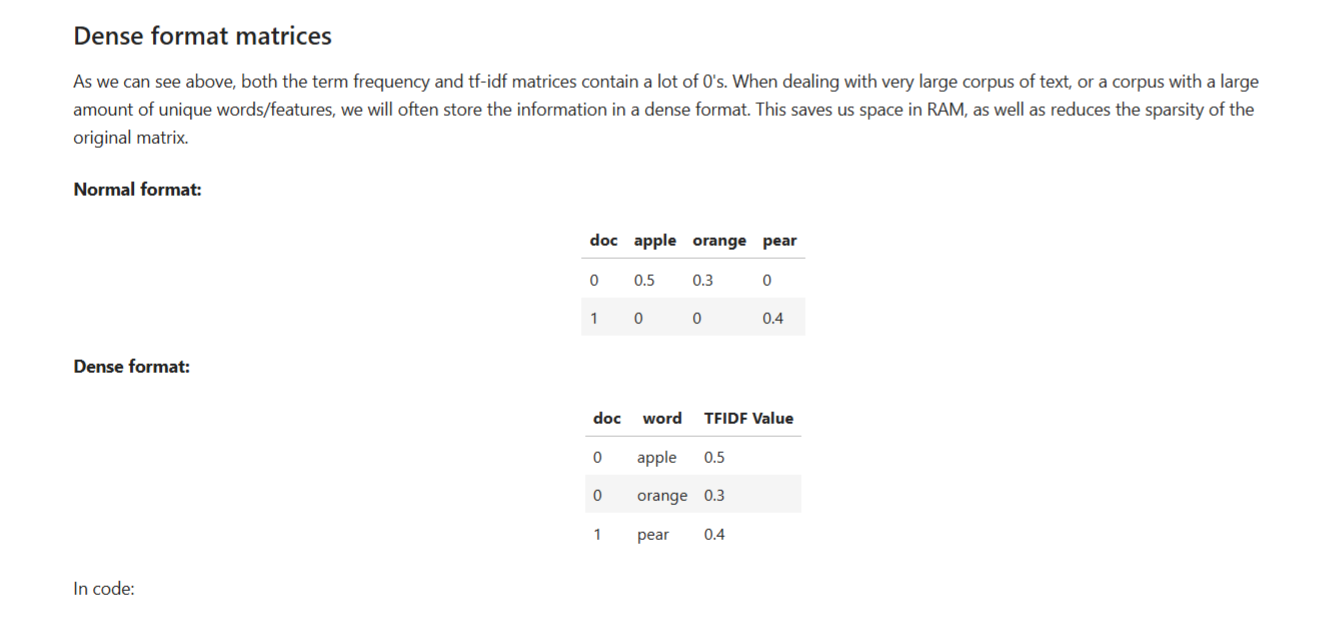

In [29]:
tfidf

TfidfTransformer()

In [31]:
# Convert the sparse TF-IDF matrix to a dense NumPy array
dense_tfidf = tfidf_mat.toarray()

# Create a Pandas DataFrame for better visualization
df_tfidf = pd.DataFrame(dense_tfidf, columns=cv.get_feature_names_out())

# Display only the non-zero values
df_tfidf[df_tfidf != 0]

able     about  above  acid  acids  actually  add     after  again  \
0         NaN       NaN    NaN   NaN    NaN       NaN  NaN       NaN    NaN   
1         NaN       NaN    NaN   NaN    NaN       NaN  NaN       NaN    NaN   
2     0.11354       NaN    NaN   NaN    NaN       NaN  NaN       NaN    NaN   
3         NaN       NaN    NaN   NaN    NaN       NaN  NaN  0.188718    NaN   
4         NaN       NaN    NaN   NaN    NaN       NaN  NaN       NaN    NaN   
...       ...       ...    ...   ...    ...       ...  ...       ...    ...   
1581      NaN  0.214699    NaN   NaN    NaN       NaN  NaN       NaN    NaN   
1582      NaN       NaN    NaN   NaN    NaN       NaN  NaN       NaN    NaN   
1583      NaN  0.121809    NaN   NaN    NaN       NaN  NaN       NaN    NaN   
1584      NaN       NaN    NaN   NaN    NaN       NaN  NaN       NaN    NaN   
1585      NaN       NaN    NaN   NaN    NaN       NaN  NaN       NaN    NaN   

      ago  ...  wouldn  wrong  www  yeah  year  years  yes       you  \
0     NaN  ...     NaN    NaN  NaN   NaN   NaN    NaN  NaN       NaN   
1     NaN  ...     NaN    NaN  NaN   NaN   NaN    NaN  NaN       NaN   
2     NaN  ...     NaN    NaN  NaN   NaN   NaN    NaN  NaN  0.044232   
3     NaN  ...     NaN    NaN  NaN   NaN   NaN    NaN  NaN       NaN   
4     NaN  ...     NaN    NaN  NaN   NaN   NaN    NaN  NaN  0.079460   
...   ...  ...     ...    ...  ...   ...   ...    ...  ...       ...   
1581  NaN  ...     NaN    NaN  NaN   NaN   NaN    NaN  NaN  0.331533   
1582  NaN  ...     NaN    NaN  NaN   NaN   NaN    NaN  NaN  0.096378   
1583  NaN  ...     NaN    NaN  NaN   NaN   NaN    NaN  NaN  0.225714   
1584  NaN  ...     NaN    NaN  NaN   NaN   NaN    NaN  NaN       NaN   
1585  NaN  ...     NaN    NaN  NaN   NaN   NaN    NaN  NaN  0.181626   

          your  yourself  
0          NaN       NaN  
1          NaN       NaN  
2          NaN       NaN  
3          NaN       NaN  
4          NaN       NaN  
...        ...       ...  
1581  0.308927       NaN  
1582  0.149678       NaN  
1583       NaN       NaN  
1584       NaN       NaN  
1585       NaN       NaN  

[1586 rows x 500 columns]

Non-Negative Matrix Factorization
Estimated time needed: 45 minutes

You've been hired by a video streaming platform that specializes in kids content. The company would like to ensure that all content on the platform does not infringe on a copyright written material. The company has created an image database of copyrighted material, not only must you detect the same images you must detect similar images. Your job is to come up with an image retrieval system to find the most similar image to each image in the provided dataset. Because your model is used for legal purposes it must be interpretable, this means it should be able to determine why the images are similar. As a result, you will use Non-Negative Matrix factorization since the factorized matrices can be interpreted as real images. You will use the Anime Face Dataset from kaggle.


image source

Table of Contents
Objectives
Datasets
Setup
Installing Required Libraries
Importing Required Libraries
Defining Helper Functions
Background
What's a Non-Negative Matrix Fatorization?
Applying Non-Negative Matrix Factorization
Image Retrieval System
Exercises
Exercise 1
Exercise 2
Exercise 3
Exercise 4
Exercise 5
Objectives
After completing this lab you will be able to:

Understand Basics Matrix operations such as Matrix addition , Vector Multiplication，and Eigen decomposition

Apply Apply these Matrix operations using numpy

Datasets
Download and unzip the images dataset:


In [32]:
import skillsnetwork

await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/images.tar.gz")

  0%|          | 0/20006 [00:00<?, ?it/s]

Saved to '.'


Setup
For this lab, we will be using the following libraries:

pandas for managing the data.
numpy for mathematical operations.
seaborn for visualizing the data.
matplotlib for visualizing the data.
sklearn for machine learning and machine-learning-pipeline related functions.
Installing required libraries
The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the # sign before !mamba in the code cell below.

In [33]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [34]:
#!conda install -c anaconda sympy -y

In [35]:
import warnings
warnings.simplefilter('ignore')

import logging
import numpy as np
import pandas as pd
from numpy.random import RandomState
import matplotlib.pyplot as plt


from sklearn.decomposition import NMF


from os import listdir,getcwd
from os.path import isfile, join
from PIL import Image, ImageOps
import os

Defining Helper Functions






Load train and test set:

In [36]:
def get_data_matrix(test=False,Length=100,Width=100,mypath="images/"):

    files = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f[0] != '.']
    if mypath + '/.DS_Store' in files:
        files.remove(mypath + '/.DS_Store')

    if test:
        print("test data")
        files=files[9000:10000]

    else:
        print("training data")
        files=files[0:9000]

    print(len(files))
    X=np.zeros((len(files),Length*Width))
    for i,file in enumerate(files):
        img = Image.open(file).resize((Width, Length))
        img =  ImageOps.grayscale(img)

        I=np.array(img)

        X[i,:]=I.reshape(1,-1)
    return X








Plot image vectors:

In [37]:
def reshape_row(x) :
    plt.imshow(x.reshape(Length,Width),cmap="gray")

This threshold function outputs an index if the input similar_distance is grater than or less than min_ and max_.

In [38]:
def threshold(similar_distance,max_=0.1,min_=0):
    dataset_index=np.where(np.logical_and(similar_distance>min_ ,similar_distance<max_))[0]
    query_index=similar_index[np.logical_and(similar_distance>min_ ,similar_distance<max_)]
    return dataset_index,query_index

Plot dataset images and query images, X and X_q are global variables.

In [39]:
def plot_data_query(dataset_index,query_index,N):
    for data_sample,query_sample in zip(dataset_index[0:N],query_index[0:N]):

        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        reshape_row(X[data_sample])
        plt.title("dataset sample {}".format(data_sample))
        plt.subplot(1,2,2)
        reshape_row(X_q[query_sample])
        plt.title("query sample match {}".format(query_sample))
        plt.show()

        print("-----------------------------------------------------")

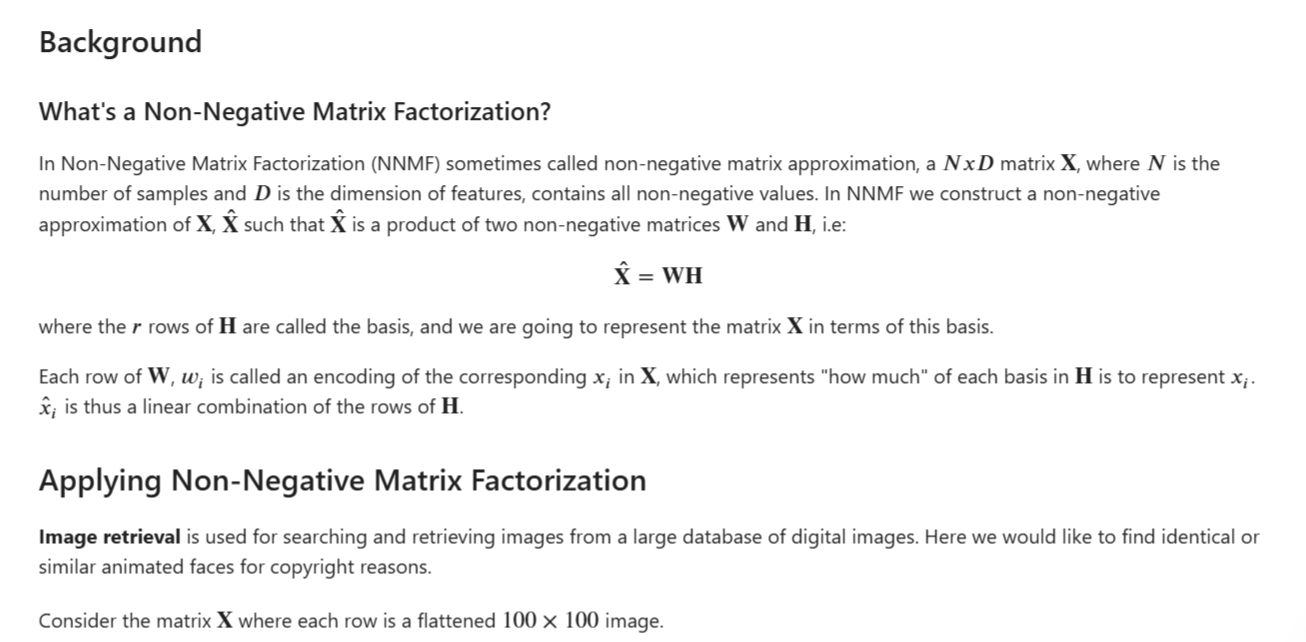

In [41]:
Length,Width=100,100
X=get_data_matrix(test=False,Length=100,Width=100,mypath="images")
X.shape

training data
9000


(9000, 10000)

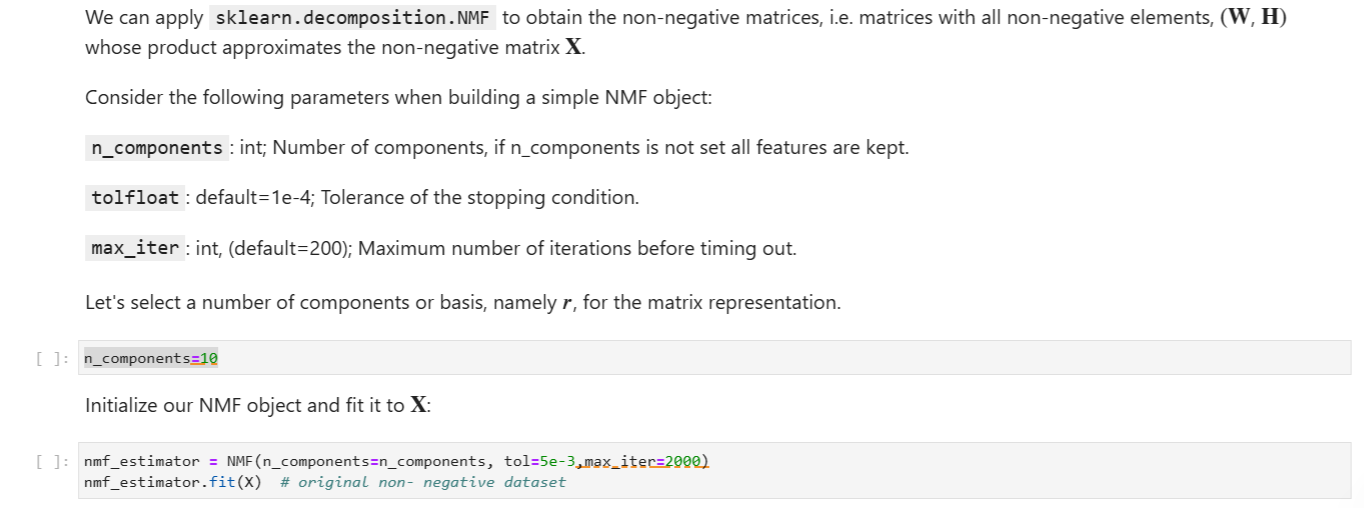

In [40]:
n_components=10

In [42]:
nmf_estimator = NMF(n_components=n_components, tol=5e-3,max_iter=2000)
nmf_estimator.fit(X)  # original non- negative dataset

NMF(max_iter=2000, n_components=10, tol=0.005)

In [43]:
H = nmf_estimator.components_

We can reshape the obtained 10 basis into images, and they appear like faces in the dataset:

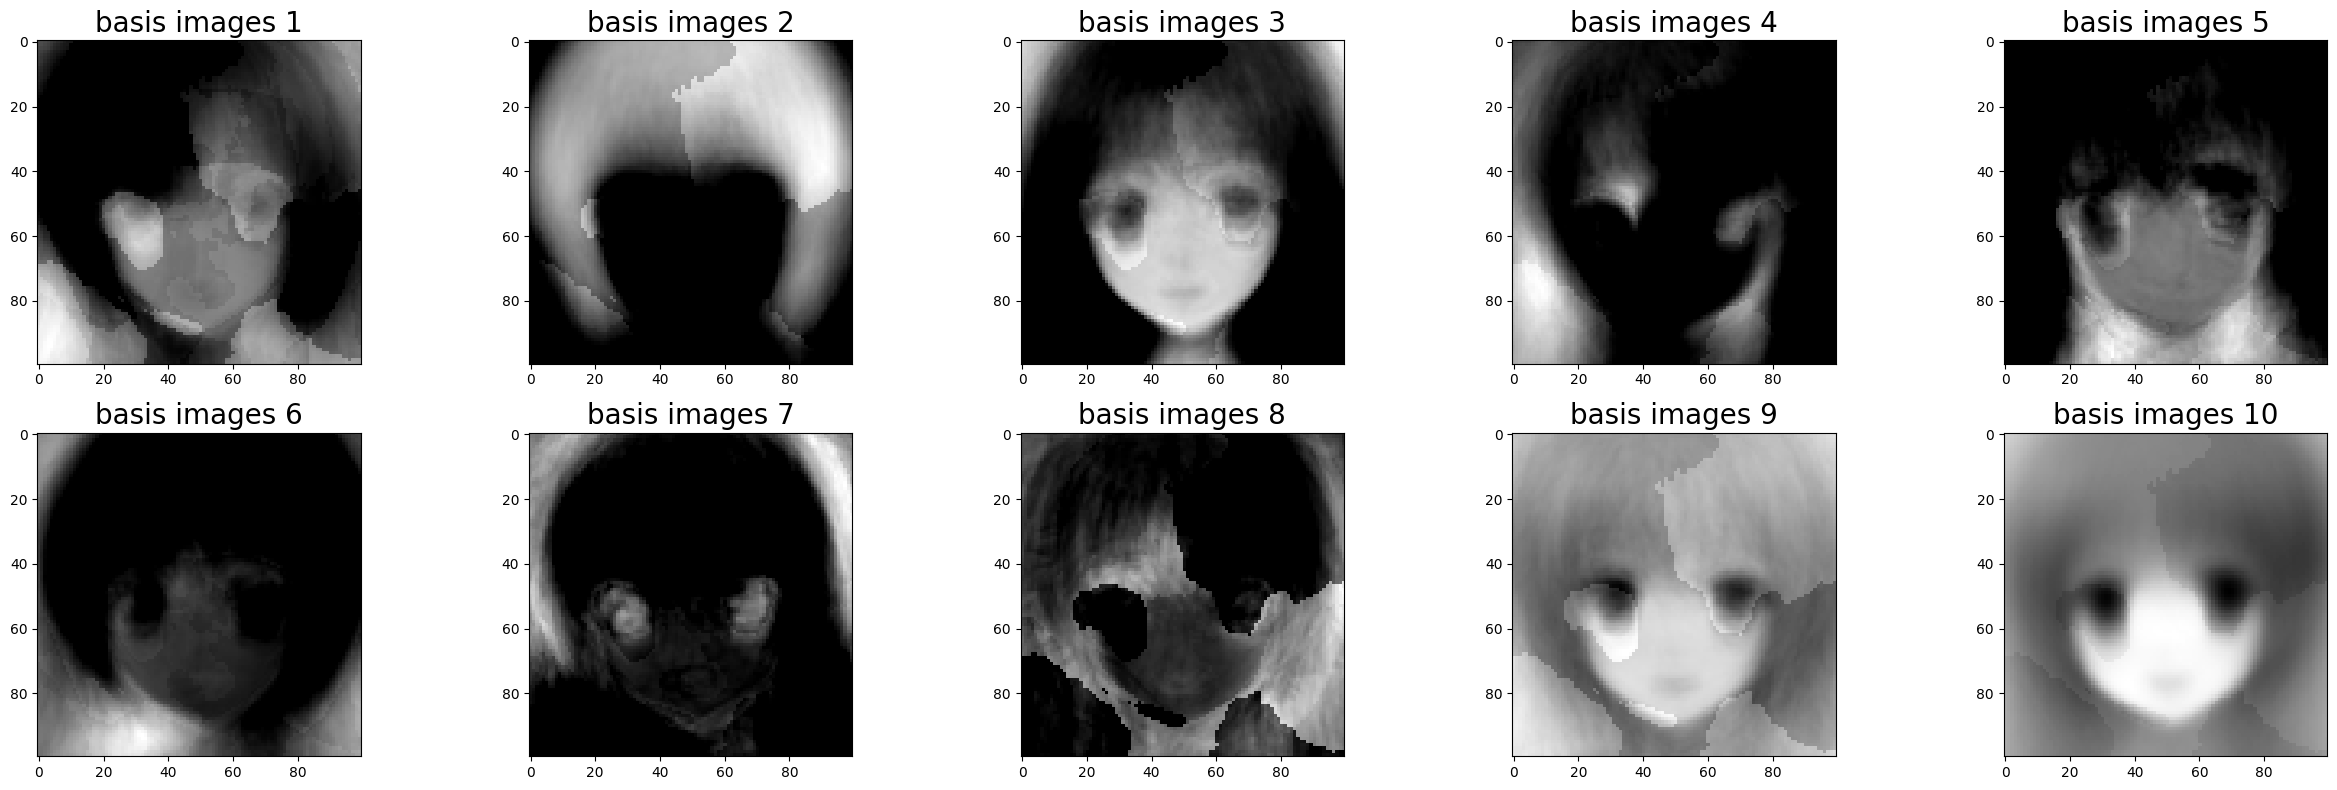

In [44]:
plt.figure(figsize=(25, 8))

for i,h in enumerate(H):
    plt.subplot(2, 5, i+1)
    reshape_row(h)
    plt.title("basis images {}".format(str(i+1)), fontsize=20)

plt.tight_layout()

We can obtain the encodings of all the images using the transform method of the fitted nmf_estimator:

In [45]:
W = nmf_estimator.transform(X)

For each of the 9000 images we have an encoding of dimension 10:

In [46]:
W.shape

(9000, 10)

The encoding tells you the projection of each image in  𝐗
𝑋
  on a particular basis. Here we plot out the encoding magnitude for the  𝑖
𝑖
 th image on each basis.

Text(0.5, 1.0, 'encodings for image 1 ')

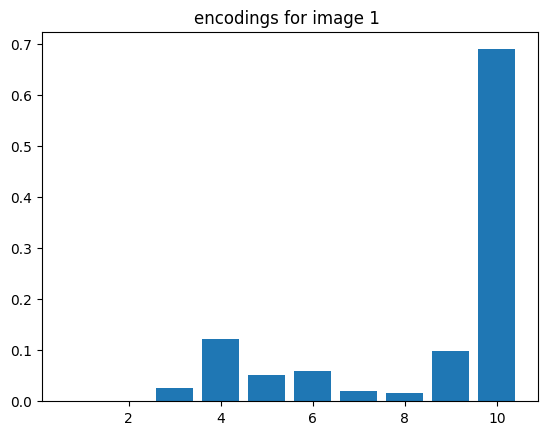

In [47]:
i=0
w=W[i,:]

plt.bar([n+1 for n in range(len(w))],w)
plt.title("encodings for image {} ".format (i+1))

We see that for image 1, the second encoding has the highest magnitude, thus we can plot out the basis associated with this encoding (i.e, the second basis) and see that it's very similar to the image. The 9th encoding has a small magnitude, we see the associated basis looks nothing like the image:

Text(0.5, 1.0, 'Dissimilar basis 9')

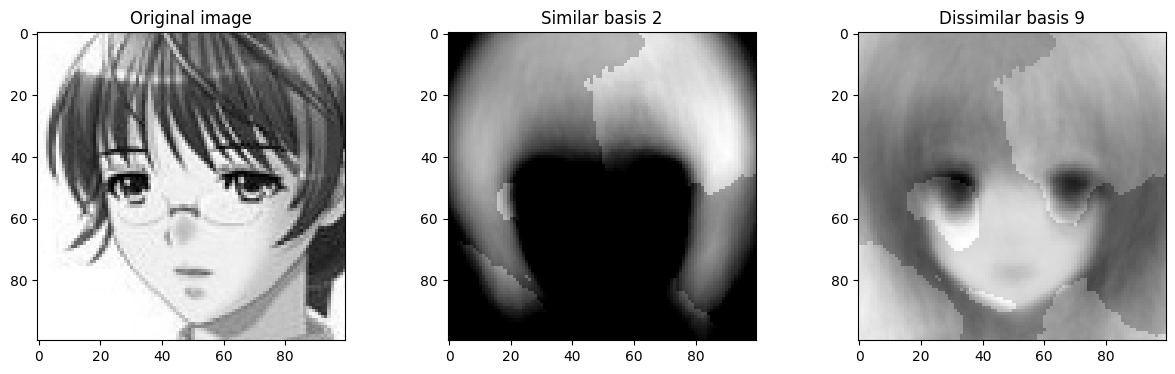

In [48]:
plt.figure(figsize=(15,4))

plt.subplot(131)
reshape_row(X[i,:])
plt.title("Original image")

plt.subplot(132)
reshape_row(H[1,:])
plt.title("Similar basis 2")

plt.subplot(133)
reshape_row(H[8,:])
plt.title("Dissimilar basis 9")

We can perform the inverse transform using the method inverse_transform to get  𝐗̂
𝑋
^
 , the approximation of  𝐗
𝑋
 :

In [49]:
Xhat=nmf_estimator.inverse_transform(W)

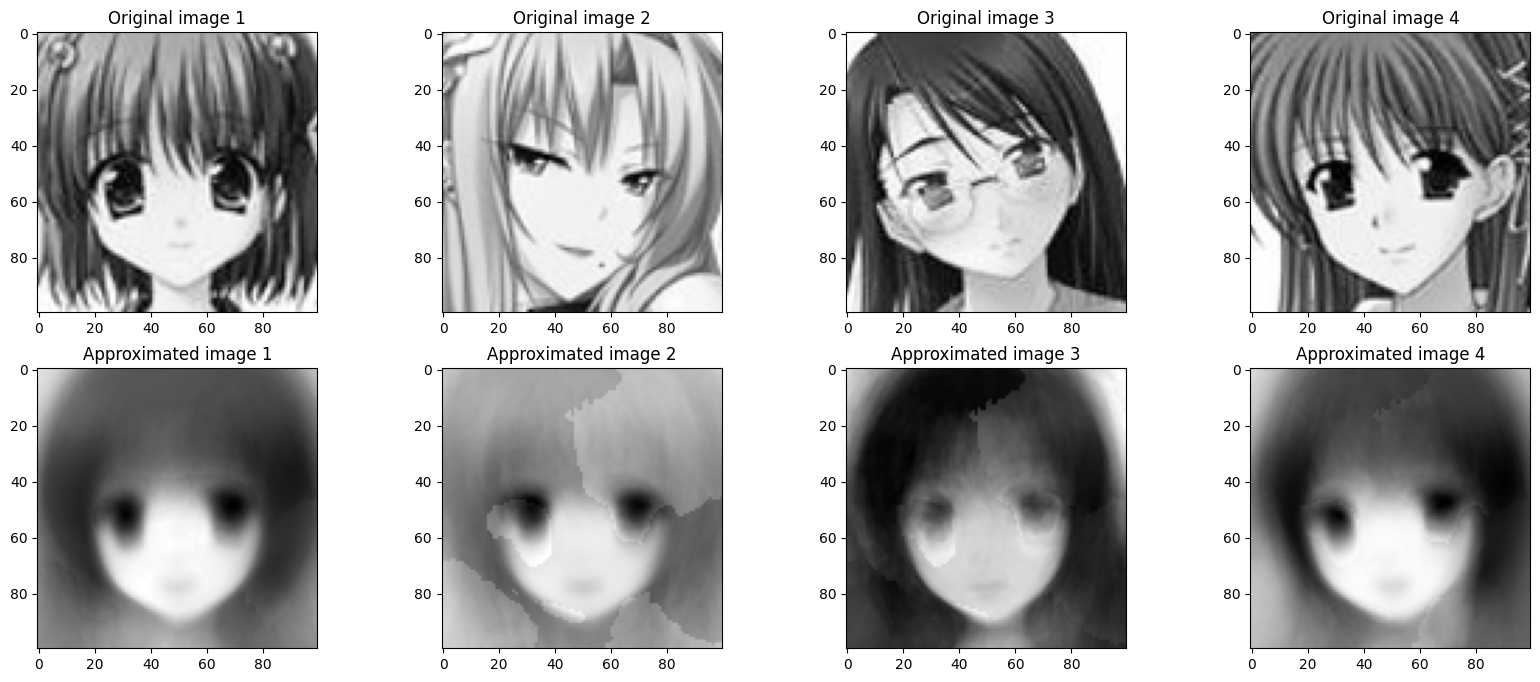

In [50]:
plt.figure(figsize=(20,8))

for i in range(1,5):
    plt.subplot(2,4,i)
    reshape_row(X[i])
    plt.title(f"Original image {i}")

    plt.subplot(2,4,i+4)
    reshape_row(Xhat[i])
    plt.title(f"Approximated image {i}")

We can verify that the scikit-learn's inverse_transform method essentially performs the following matrix operation

In [51]:
Xhat_M=W@H

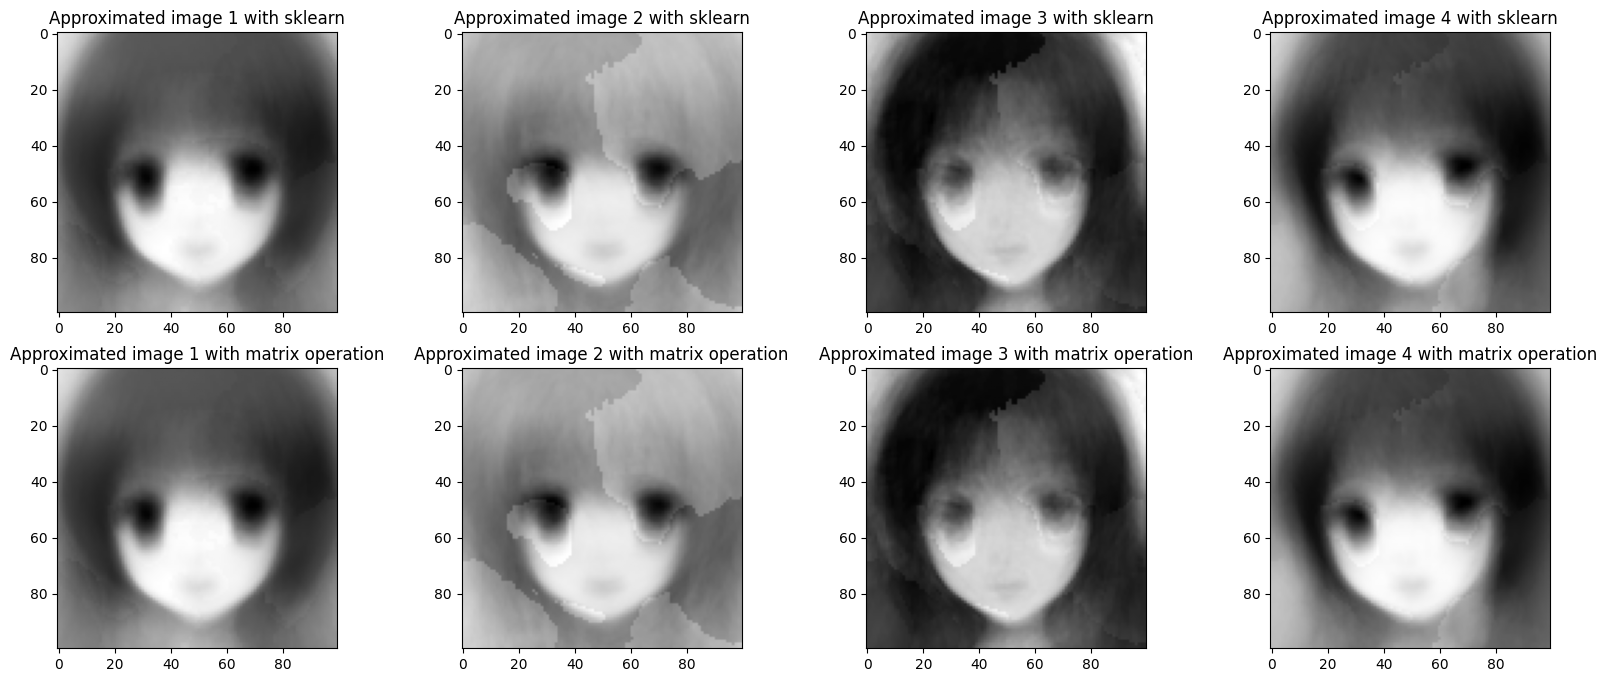

In [52]:
plt.figure(figsize=(20,8))

for i in range(1,5):
    plt.subplot(2,4,i)
    reshape_row(Xhat[i])
    plt.title(f"Approximated image {i} with sklearn")

    plt.subplot(2,4,i+4)
    reshape_row(Xhat_M[i])
    plt.title(f"Approximated image {i} with matrix operation")

We can reconstruct the image by adding one component multiplied by it's encoding at a time. This is shown in the following lines of code, as each successive component is added we see the image looks more and more like it's approximation:

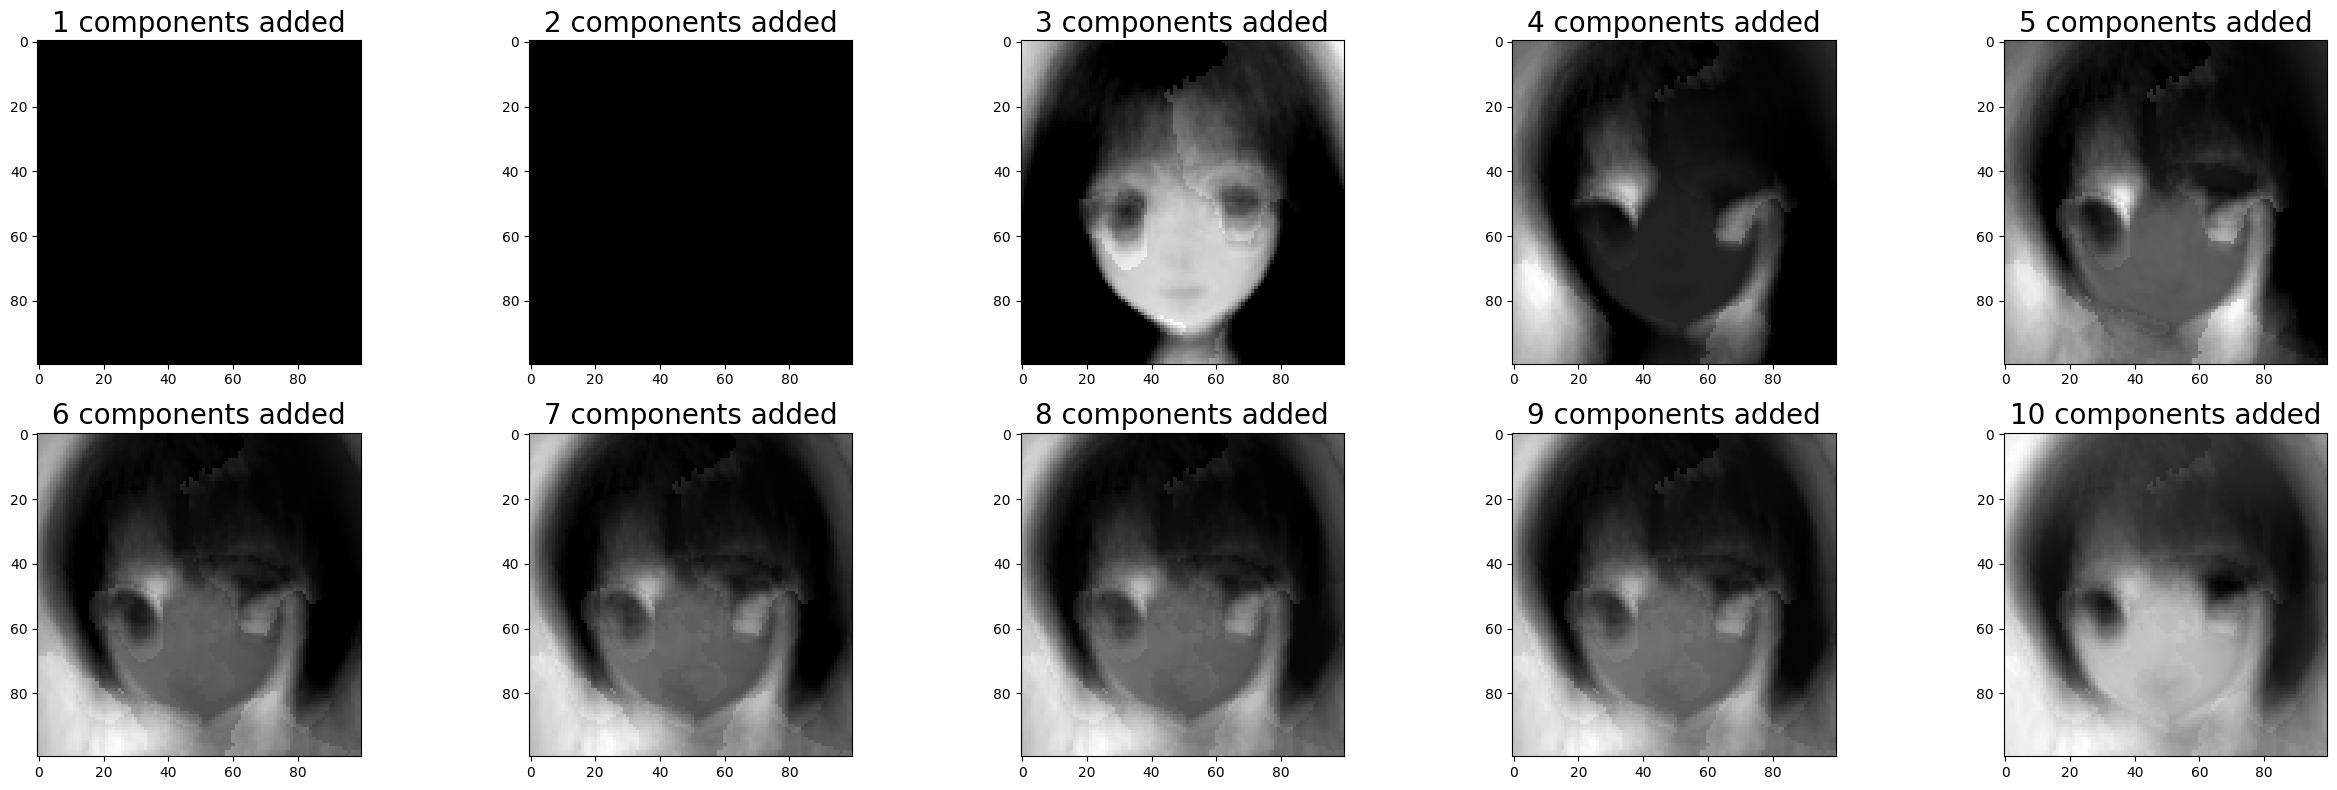

In [53]:
# initialize an image array with 10000 zeros which will be reshaped as 100x100
image=np.zeros((1,10000))

plt.figure(figsize=(25,8))
for i, (w_, h) in enumerate(zip(w, H)):

    # w is the encoding vector of the first image in X
    # reconstruction of the image is a linear combination of H
    plt.subplot(2,5,i+1)
    image += w_*h
    reshape_row(image)
    plt.title(f"{i+1} components added", fontsize=20)
plt.tight_layout()

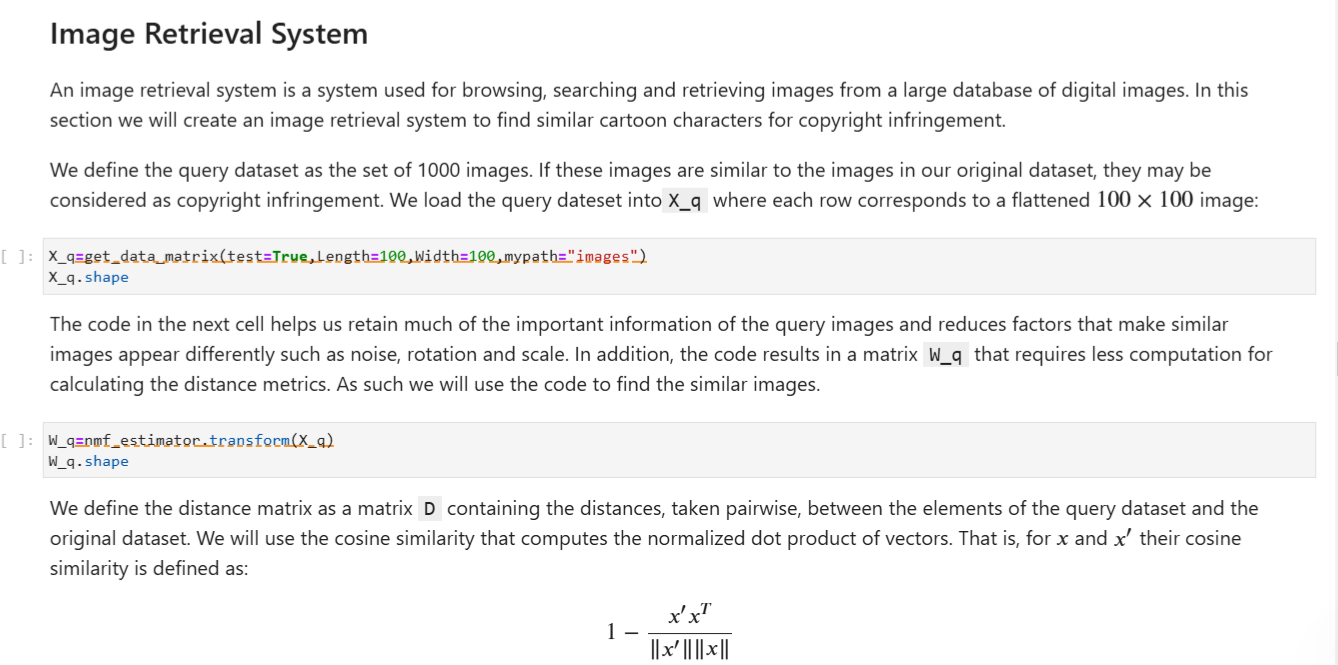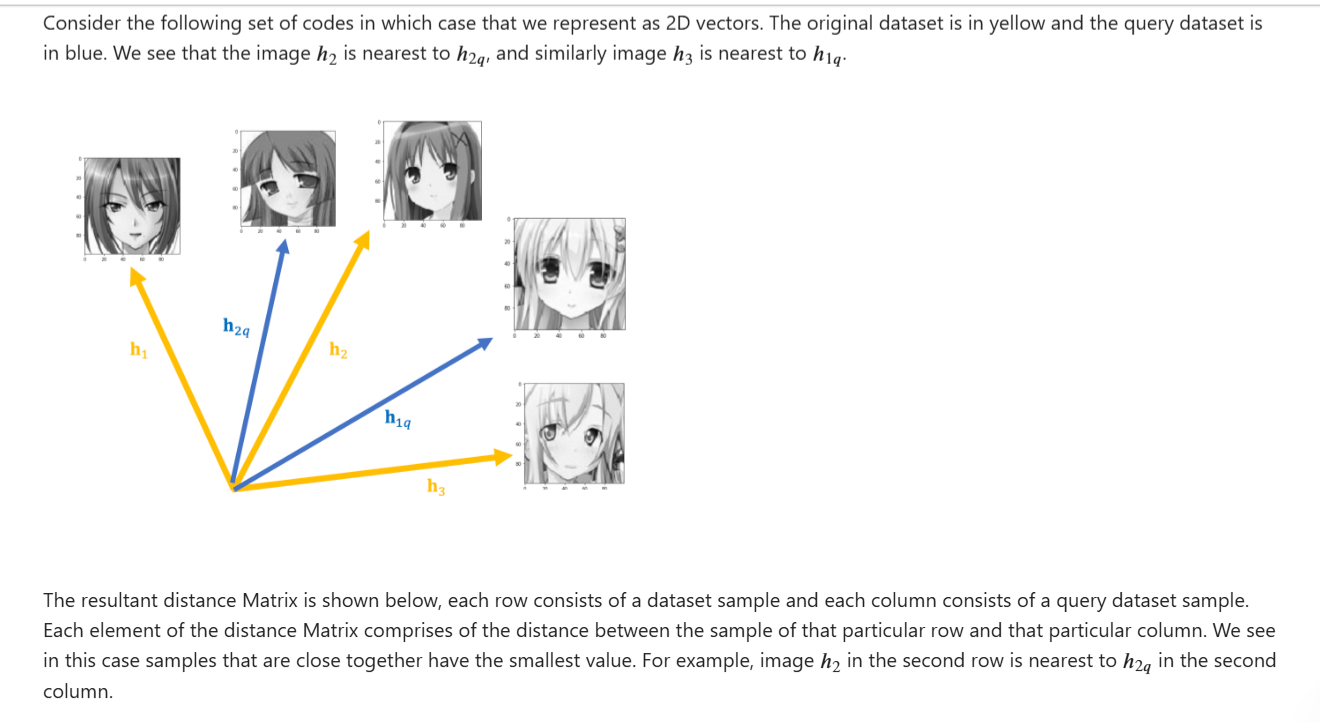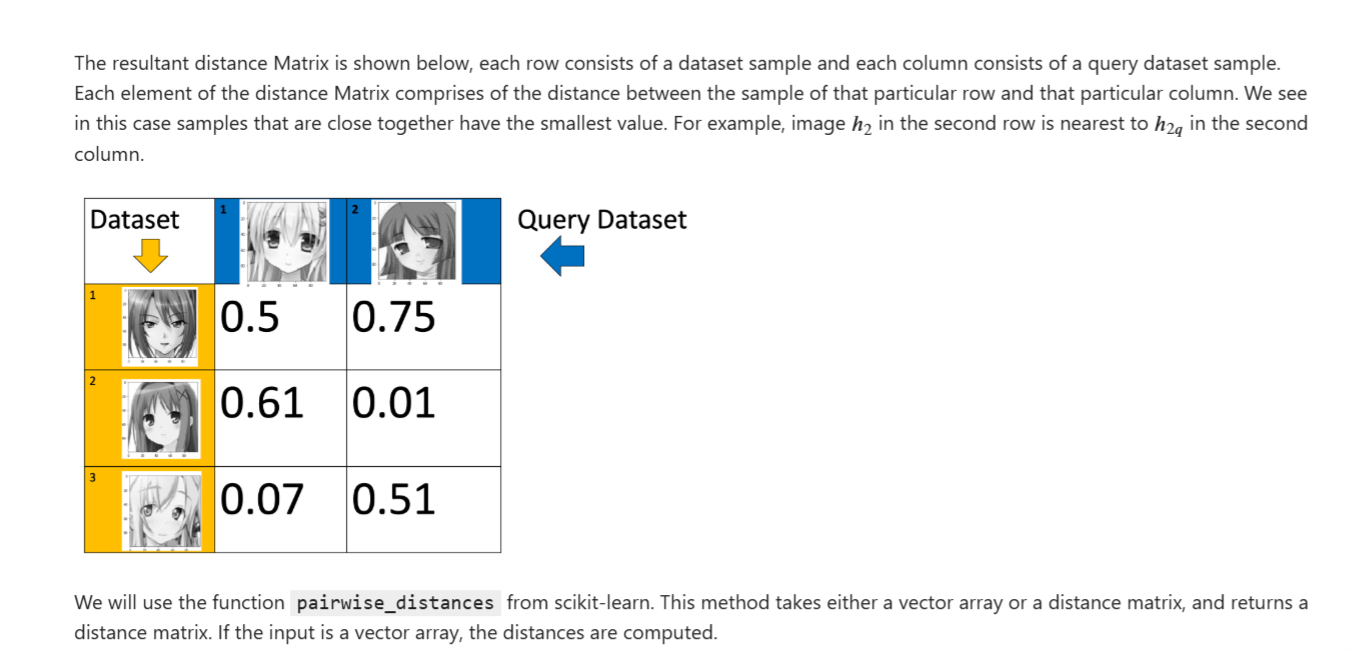

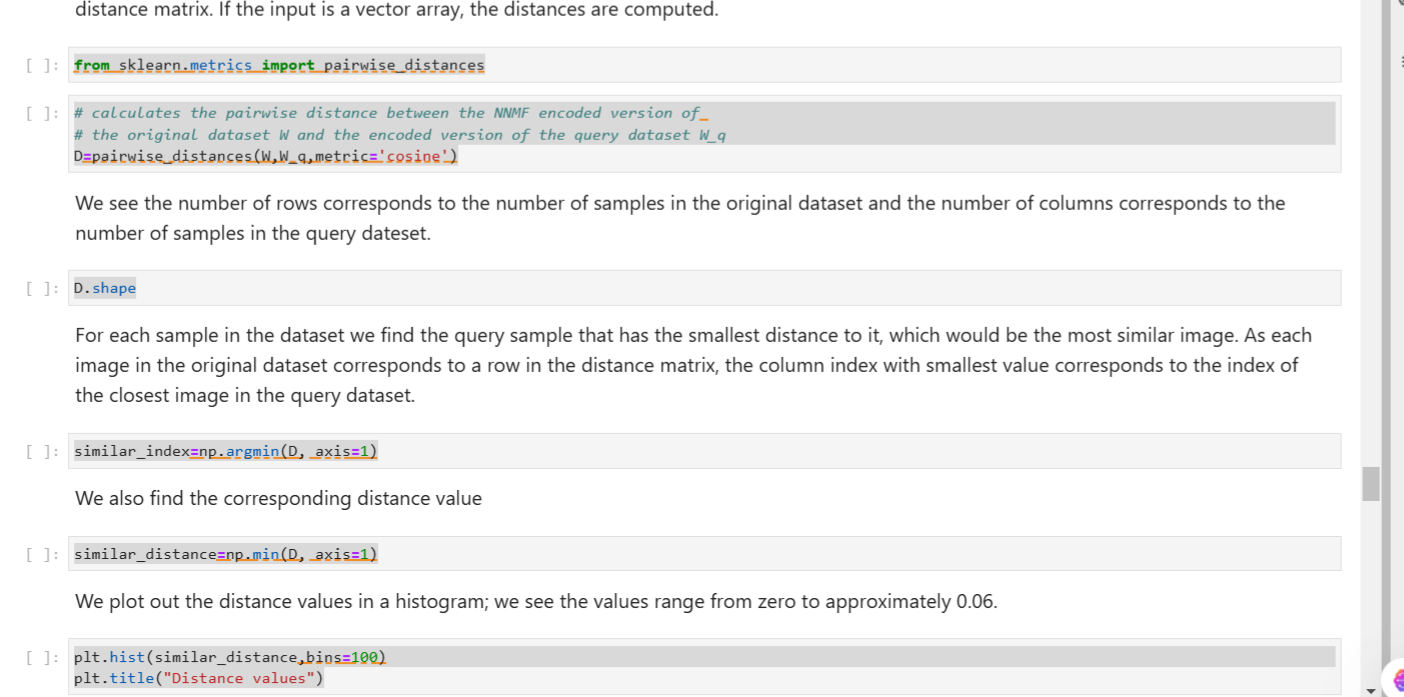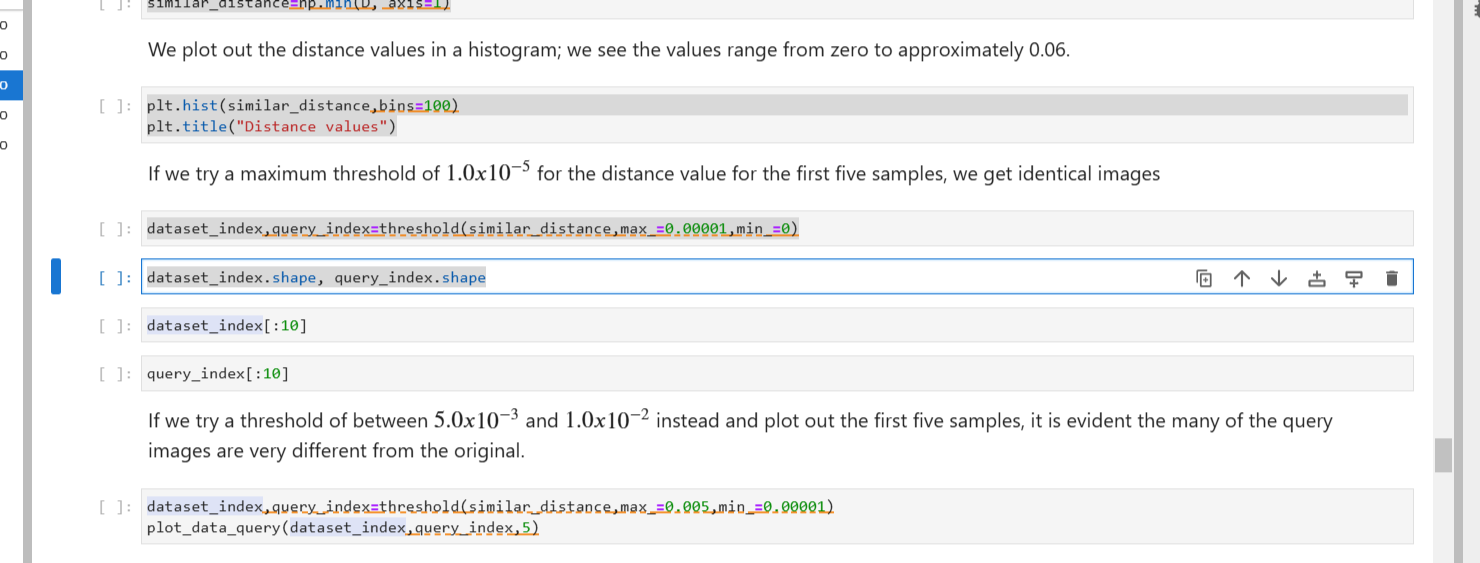

In [54]:
from sklearn.metrics import pairwise_distances

In [57]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Example NNMF encoded matrices (replace these with your actual matrices)
W = np.random.rand(100, 20)   # 100 samples, 20 features (encoded space)
W_q = np.random.rand(10, 20)  # 10 query samples, same feature space

# Compute the pairwise cosine distances
D = pairwise_distances(W, W_q, metric='cosine')

# Display the shape of D
print("Shape of D:", D.shape)  # Should be (100, 10)


Shape of D: (100, 10)


In [58]:
similar_index=np.argmin(D, axis=1)

In [59]:
similar_distance=np.min(D, axis=1)

Text(0.5, 1.0, 'Distance values')

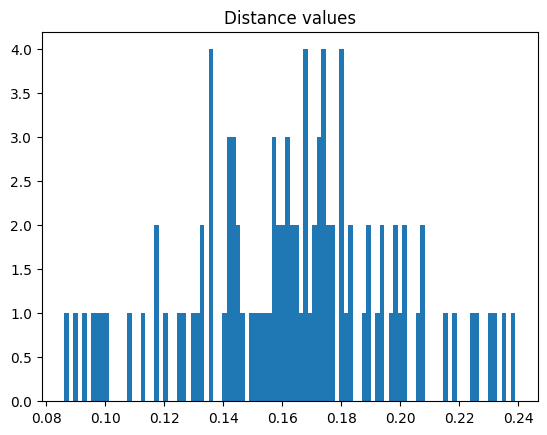

In [60]:
plt.hist(similar_distance,bins=100)
plt.title("Distance values")

In [61]:
dataset_index,query_index=threshold(similar_distance,max_=0.00001,min_=0)

In [62]:
dataset_index.shape, query_index.shape

((0,), (0,))

In [63]:
dataset_index[:10]

array([], dtype=int64)

In [64]:
query_index[:10]


array([], dtype=int64)

Exercises
In this exercise, you will apply NMF on the face images from scikit-learn and perform an image retrievel task to find pairs of faces that are similar.

In [65]:
from sklearn.datasets import fetch_olivetti_faces

rng = RandomState(0)
data = fetch_olivetti_faces(shuffle=True, random_state=rng)
X = data.images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [66]:
image_shape = (64, 64)

def plot_faces(title, images, n_col, n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows = n_row,
        ncols = n_col,
        figsize = (2.0*n_col, 2.3*n_row),
        facecolor='white',
        constrained_layout=True)

    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax)
        ax.axis('off')

    fig.colorbar(im, ax=axs, orientation='horizontal', shrink=0.99,
                aspect=40, pad=0.01)
    plt.show()

We use the plot_faces function to plot the first 6 faces in the dataset.

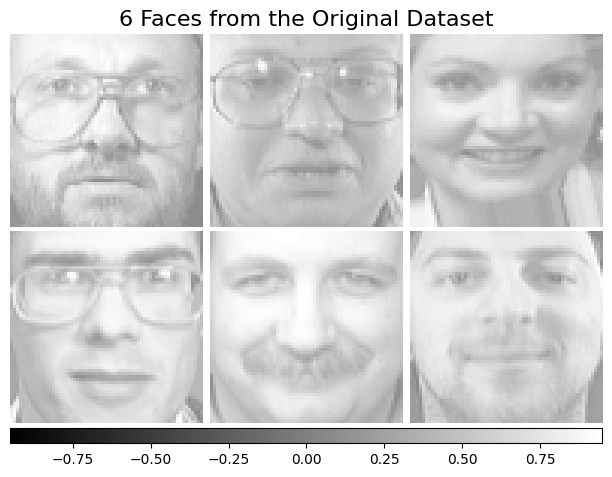

In [67]:
plot_faces("6 Faces from the Original Dataset", X[:6], 3, 2)

Exercise 1
Split the dataset into two such that the first 300 is used as the original dataset X_r and the remaining 100 is used as the query dataset X_q. Initialize a NMF instance with n_components = 10, and use it to transform X_r and X_q into encodings.



In [68]:
X_r = X[:300].reshape((300, 64*64))
X_q = X[300:].reshape((100, 64*64))

nmf = NMF(n_components=10, tol=5e-3,max_iter=2000)
X_r_W = nmf.fit_transform(X_r)
X_q_W = nmf.fit_transform(X_q)

In [70]:
nmf = NMF(n_components=6, tol=5e-3,max_iter=2000)
# Reshape X to 2D: (number of images, image size flattened)
X_reshaped = X.reshape(X.shape[0], -1)
nmf.fit(X_reshaped)

NMF(max_iter=2000, n_components=6, tol=0.005)

Exercise 2
Calculate the pairwise distances between face encodings from the original and query dataset, store the result in D.

In [71]:
from sklearn.metrics import pairwise_distances

D = pairwise_distances(X_r_W, X_q_W, metric='cosine')

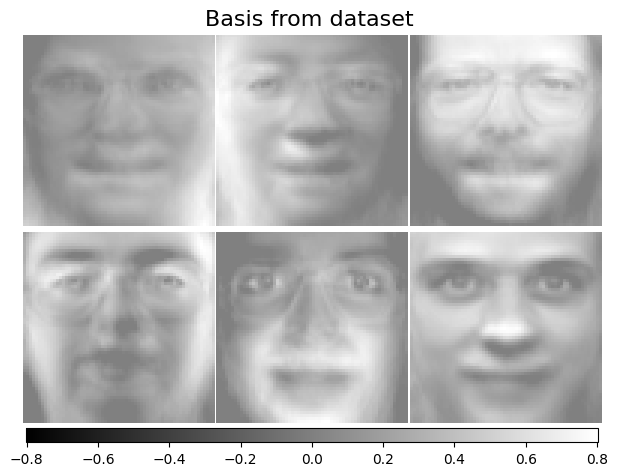

In [72]:
H = nmf.components_
plot_faces("Basis from dataset", H, 3, 2)

Exercise 3¶
For all rows in the pairwise distance matrix, output their smallest distances as similar_distance, and the index associated with the smallest distances as similar_index.

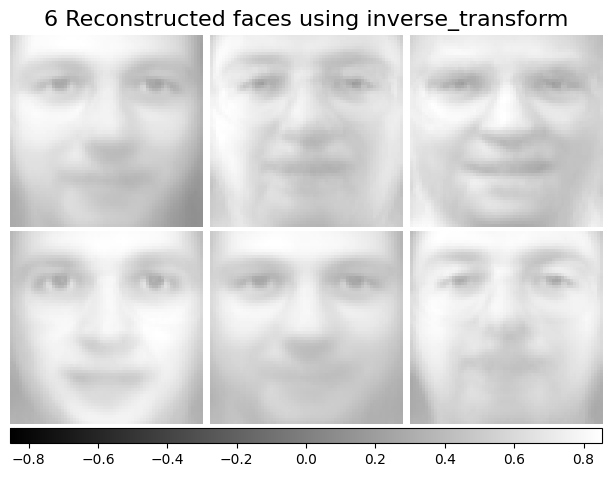

In [74]:
similar_index = np.argmin(D, axis=1)
similar_distance = np.min(D, axis=1)

# Reshape X to have 2 dimensions (samples, features)
nsamples, nx, ny = X.shape
X_reshaped = X.reshape((nsamples, nx*ny))

# Apply transform to the reshaped data
W = nmf.transform(X_reshaped)

w6 = W[:6, :] # picking the first 6 encodings

X_hat = nmf.inverse_transform(w6)
plot_faces("6 Reconstructed faces using inverse_transform", X_hat, 3, 2)

Exercise 4
Use the similar_distance as input for the threshold function. You can specify the min and max threshold for the distances. Return the index of the original dataset and the query dataset that satisfy the specified threshold. Use plot_data_query to plot the first 5 pairs of face images that our image retrieval system "views" as similar.

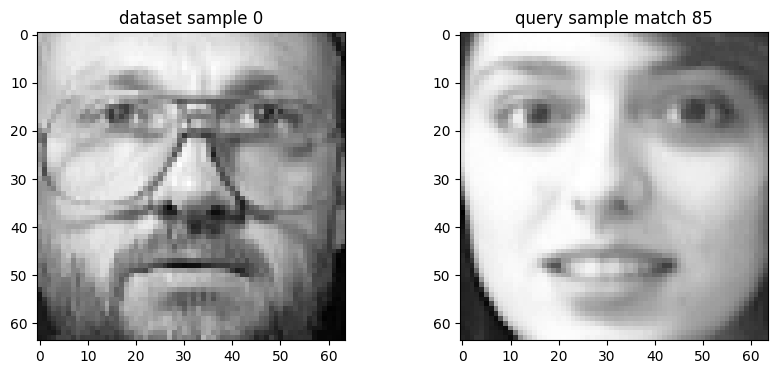

-----------------------------------------------------


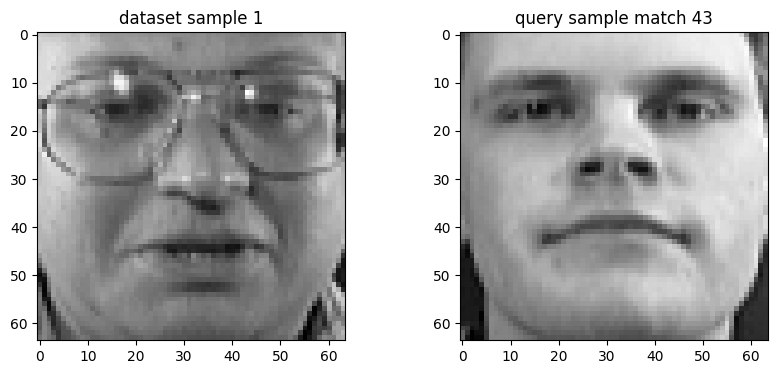

-----------------------------------------------------


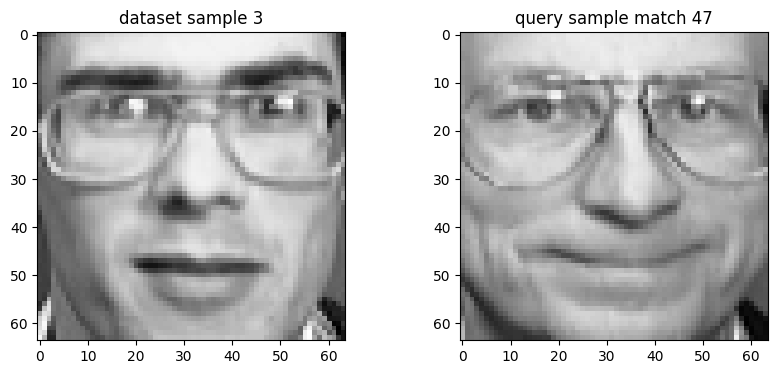

-----------------------------------------------------


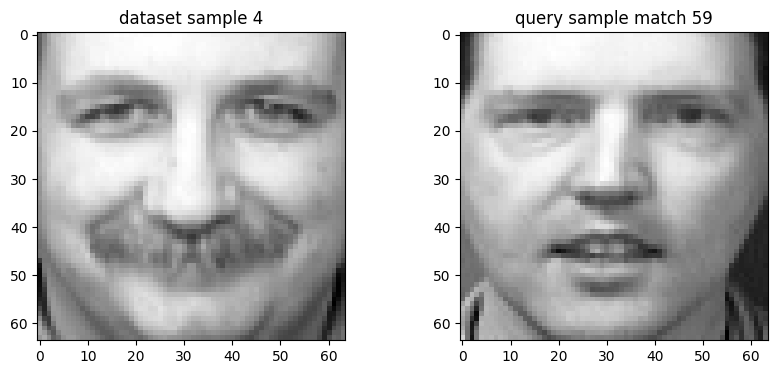

-----------------------------------------------------


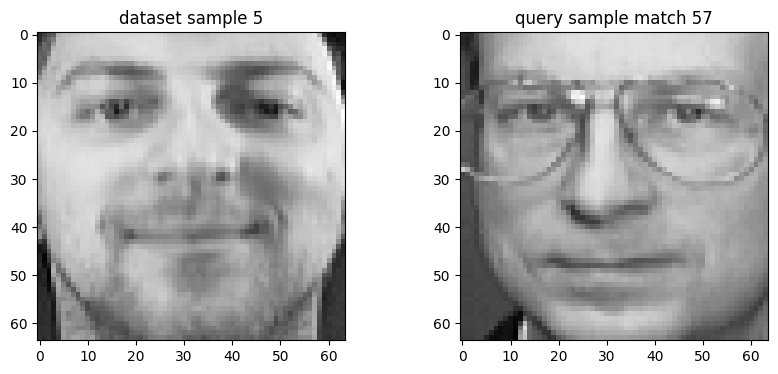

-----------------------------------------------------


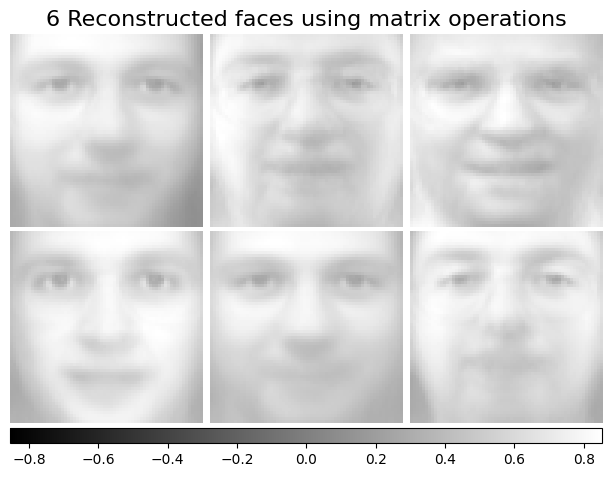

-------------------------------------------------------


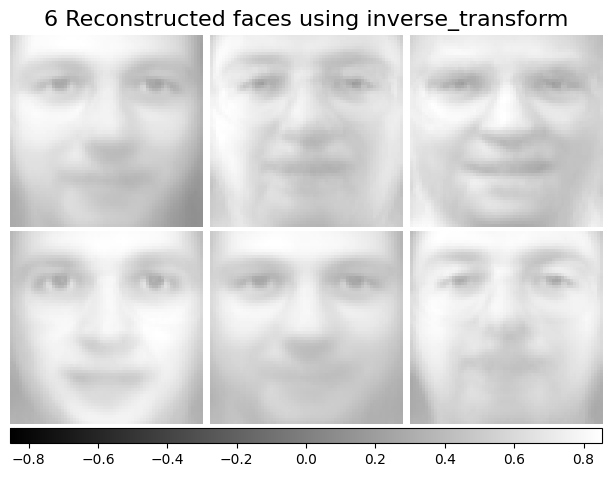

In [75]:
o_index, q_index = threshold(similar_distance)

Length=64
Width=64
plot_data_query(o_index, q_index, 5)

X_hat_M = w6@H
plot_faces("6 Reconstructed faces using matrix operations", X_hat_M, 3,2)
print("-------------------------------------------------------")
plot_faces("6 Reconstructed faces using inverse_transform", X_hat, 3, 2)